# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# change matplotlib defaults
plt.rcParams['figure.figsize'] = [8, 6]

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
temp = pd.read_csv('./Temp_States.csv', index_col=0)

#### Print `temp`

In [4]:
temp.shape

(7, 2)

In [5]:
temp

State  Temperature
City                                
NYC            New York    19.444444
Albany         New York     9.444444
Buffalo        New York     3.333333
Hartford    Connecticut    17.222222
Bridgeport  Connecticut    14.444444
Treton       New Jersey    22.222222
Newark       New Jersey    20.000000

#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, NYC to Newark
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        7 non-null      object 
 1   Temperature  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 168.0+ bytes


In this dataset we have two column indexed by city

First column indicates the name of the state and as a name it's correct that pandas recognise it as an object.

Second column shows the temperature of the state and temperature could is a type of data than can be a float

#### Select the rows where state is New York

In [7]:
nyc = temp[temp.State == "New York"]
nyc

State  Temperature
City                          
NYC      New York    19.444444
Albany   New York     9.444444
Buffalo  New York     3.333333

#### What is the average of the temperature of cities in New York?

In [8]:
round(nyc.mean(),2)

Temperature    10.74
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [9]:
temp_higher_15 = temp[temp.Temperature > 15]
temp_higher_15

State  Temperature
City                              
NYC          New York    19.444444
Hartford  Connecticut    17.222222
Treton     New Jersey    22.222222
Newark     New Jersey    20.000000

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [10]:
city_higher_15 = temp[temp.Temperature > 15]

city_higher_15.iloc[:, [1]]

Temperature
City                 
NYC         19.444444
Hartford    17.222222
Treton      22.222222
Newark      20.000000

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [11]:
cities_15_20 = temp[(temp.Temperature>15) & (temp.Temperature<20)]
cities_15_20

State  Temperature
City                              
NYC          New York    19.444444
Hartford  Connecticut    17.222222

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [12]:
state_mean = temp.groupby("State").Temperature.mean()
state_mean

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [13]:
state_std = temp.groupby("State").Temperature.std()
state_std

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [14]:
employee = pd.read_csv('./employee.csv', index_col=0)

#### Explore the data types of the Temp dataframe. Comment your results

In [15]:
employee.shape

(9, 6)

In [16]:
employee

Department Education Gender      Title  Years  Salary
Name                                                        
Jose           IT  Bachelor      M    analyst      1      35
Maria          IT    Master      F    analyst      2      30
David          HR    Master      M    analyst      2      30
Sonia          HR  Bachelor      F    analyst      4      35
Samuel      Sales    Master      M  associate      3      55
Eva         Sales  Bachelor      F  associate      2      55
Carlos         IT    Master      M         VP      8      70
Pedro          IT       Phd      M  associate      7      60
Ana            HR    Master      F         VP      8      70

In [17]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Jose to Ana
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  9 non-null      object
 1   Education   9 non-null      object
 2   Gender      9 non-null      object
 3   Title       9 non-null      object
 4   Years       9 non-null      int64 
 5   Salary      9 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 504.0+ bytes


Employee is a dataset 9 registers, 6 columns and is indexed by the name of the employee.

Most of our columns are object type although the could be algo category type as they contain information about the employee related with the department they are in, level of education, gender and title.

It also have information integer type about the years the employee has been in the company and their salaries

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

Text(0, 0.5, 'Count')

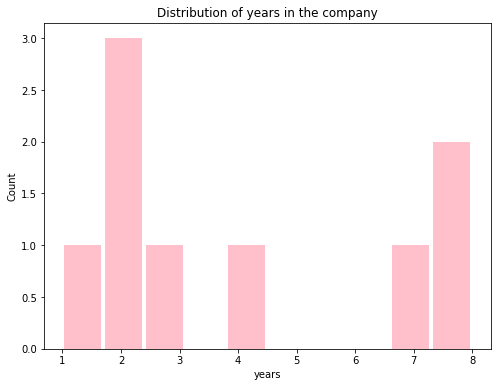

In [18]:
plt.hist(x=employee.Years, bins = 10, rwidth=0.9, color = 'pink' )
# Set titles, labels, etc
plt.title('Distribution of years in the company')
plt.xlabel('years')
plt.ylabel('Count')

Most of the employees have been in the company around 2 years. However, 2 employees have been 8 years in the company.

Text(0.5, 0, 'salary')

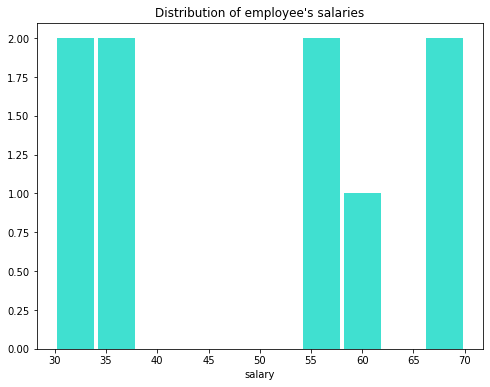

In [19]:
plt.hist(x=employee.Salary, bins = 10, rwidth=0.90, color = '#40E0D0')
# Set titles, labels, etc
plt.title("Distribution of employee's salaries")
plt.xlabel("salary")

There are 5 main bins of an emplyee's salary: 30k, 35k, 55k, 60k and 70k.

#### What's the average salary in this company?

In [20]:
avg_salary = round((employee.Salary).mean(), 2)
print(f"{avg_salary}k")

48.89k


#### What's the highest salary?

In [21]:
max_salary = (employee.Salary).max()
print(f"{max_salary}k")

70k


#### What's the lowest salary?

In [22]:
min_salary = (employee.Salary).min()
print(f"{max_salary}k")

70k


#### Who are the employees with the lowest salary?

In [23]:
employees_lowest_salary = employee.nsmallest(3,"Salary")
employees_lowest_salary.iloc[:, [5]]

Salary
Name         
Maria      30
David      30
Jose       35

#### Could you give all the information about an employee called David?

In [24]:
david_employee = employee.loc["David"]
david_employee

Department         HR
Education      Master
Gender              M
Title         analyst
Years               2
Salary             30
Name: David, dtype: object

#### Could you give only David's salary?

In [25]:
david_salary = david_employee.Salary
print(f"David makes {david_salary}k")

David makes 30k


#### Print all the rows where job title is associate

In [26]:
job_title_associate = employee[employee.Title == "associate"]
job_title_associate

Department Education Gender      Title  Years  Salary
Name                                                        
Samuel      Sales    Master      M  associate      3      55
Eva         Sales  Bachelor      F  associate      2      55
Pedro          IT       Phd      M  associate      7      60

#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [27]:
employee.head(3)

Department Education Gender    Title  Years  Salary
Name                                                     
Jose          IT  Bachelor      M  analyst      1      35
Maria         IT    Master      F  analyst      2      30
David         HR    Master      M  analyst      2      30

In [28]:
employee.iloc[0:3]

Department Education Gender    Title  Years  Salary
Name                                                     
Jose          IT  Bachelor      M  analyst      1      35
Maria         IT    Master      F  analyst      2      30
David         HR    Master      M  analyst      2      30

#### Find the employees who's title is associate and the salary above 55?

In [29]:
associate_salary_55 = employee[(employee.Title == "associate") & (employee.Salary > 55)]
associate_salary_55

Department Education Gender      Title  Years  Salary
Name                                                       
Pedro         IT       Phd      M  associate      7      60

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [30]:
years_salaries = employee.groupby("Years").Salary.mean()
years_salaries

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [31]:
title_salaries = employee.groupby("Title").Salary.mean()
title_salaries

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

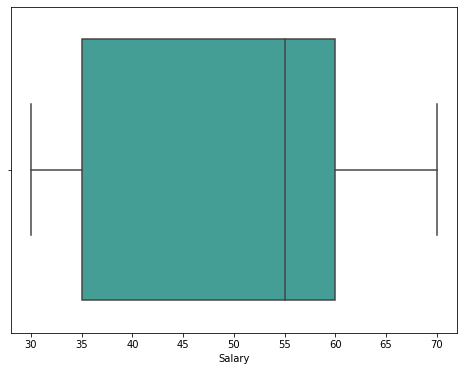

In [32]:
sns.boxplot(x="Salary",  data=employee,  color = "#36ada1")
plt.show()

In [33]:
# print first quartile here
print(f"{round(employee.Salary.quantile(0.25))}k")

35k


In [34]:
# print third quartile here
print(f"{round(employee.Salary.quantile(0.75))}k")

60k


#### Is the mean salary per gender different?

In [35]:
gender_salaries_mean = employee.groupby("Gender").Salary.mean()
gender_salaries_mean

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

Women earns 6% less than men

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [36]:
employee.groupby("Department").agg({"Years": [min, max, np.mean], "Salary": [min, max, np.mean]})

Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [37]:
employee.groupby('Department')["Salary"].agg(['min', 'max'])

min  max
Department          
HR           30   70
IT           30   70
Sales        55   55

In [38]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

max_min_salary = employee.groupby("Department")["Salary"].apply(lambda x: x.max() - x.min())
max_min_salary

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [39]:
!tar -xzvf Orders.zip

x Orders.csv


In [40]:
orders = pd.read_csv('./Orders.csv', index_col=0)
orders.head(4)

InvoiceNo StockCode  year  month  day  hour  \
0     536365    85123A  2010     12    3     8   
1     536365     71053  2010     12    3     8   
2     536365    84406B  2010     12    3     8   
3     536365    84029G  2010     12    3     8   

                           Description  Quantity          InvoiceDate  \
0   white hanging heart t-light holder         6  2010-12-01 08:26:00   
1                  white metal lantern         6  2010-12-01 08:26:00   
2       cream cupid hearts coat hanger         8  2010-12-01 08:26:00   
3  knitted union flag hot water bottle         6  2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  amount_spent  
0       2.55       17850  United Kingdom         15.30  
1       3.39       17850  United Kingdom         20.34  
2       2.75       17850  United Kingdom         22.00  
3       3.39       17850  United Kingdom         20.34

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [41]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     397924 non-null  int64  
 1   StockCode     397924 non-null  object 
 2   year          397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   Description   397924 non-null  object 
 7   Quantity      397924 non-null  int64  
 8   InvoiceDate   397924 non-null  object 
 9   UnitPrice     397924 non-null  float64
 10  CustomerID    397924 non-null  int64  
 11  Country       397924 non-null  object 
 12  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 42.5+ MB


####  What is the average Purchase Price?

In [42]:
purchase_price_avg = round((orders.amount_spent).mean(), 2)
purchase_price_avg

22.39

#### What were the highest and lowest purchase prices? 

In [43]:
purchase_price_max = round((orders.amount_spent).max(), 2)
purchase_price_max

168469.6

In [44]:
# purchase_price_min = round((orders.amount_spent).min(), 2)
# purchase_price_min

purchase_price_gt0 = orders[orders.amount_spent.gt(0)]

purchase_price_min = (purchase_price_gt0.amount_spent).min()
purchase_price_min

0.001

#### Select all the customers we have in Spain

In [45]:
spain_customers = orders[orders.Country == "Spain"]
spain_customers 

InvoiceNo StockCode  year  month  day  hour  \
6421       536944     22383  2010     12    5    12   
6422       536944     22384  2010     12    5    12   
6423       536944     20727  2010     12    5    12   
6424       536944     20725  2010     12    5    12   
6425       536944     20728  2010     12    5    12   
...           ...       ...   ...    ...  ...   ...   
535271     581193     23291  2011     12    3    17   
535272     581193    85232D  2011     12    3    17   
535273     581193     22721  2011     12    3    17   
535274     581193     23241  2011     12    3    17   
535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
6421          lunch bag suki  design         70  2010-12-03 12:20:00   
6422          lunch bag pink polkadot       100  2010-12-03 12:20:00   
6423          lunch bag  black skull.        60  2010-12-03 12:20:00   
6424          lunch bag red retrospot        70  2010-12-03 12:20:00   
6425              lunch bag cars blue       100  2010-12-03 12:20:00   
...                               ...       ...                  ...   
535271       dolly girl childrens cup         2  2011-12-07 17:05:00   
535272  set/3 decoupage stacking tins         1  2011-12-07 17:05:00   
535273  set of 3 cake tins sketchbook         2  2011-12-07 17:05:00   
535274   treasure tin gymkhana design         1  2011-12-07 17:05:00   
535275     biscuit tin 50's christmas         1  2011-12-07 17:05:00   

        UnitPrice  CustomerID Country  amount_spent  
6421         1.65       12557   Spain        115.50  
6422         1.45       12557   Spain        145.00  
6423         1.65       12557   Spain         99.00  
6424         1.65       12557   Spain        115.50  
6425         1.45       12557   Spain        145.00  
...           ...         ...     ...           ...  
535271       1.25       17097   Spain          2.50  
535272       4.95       17097   Spain          4.95  
535273       1.95       17097   Spain          3.90  
535274       2.08       17097   Spain          2.08  
535275       2.89       17097   Spain          2.89  

[2485 rows x 13 columns]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [46]:
num_spanish_customers = spain_customers.CustomerID.value_counts().sum()
num_spanish_customers

2485

#### Select all the customers who have bought more than 50 items ?

In [47]:
group_by_customerid = orders.groupby("CustomerID").count()
# customers_50 = group_by_customerid.get(group_by_customerid.Quantity > 50)
# customers_50

customer_more50 = group_by_customerid[(group_by_customerid.Quantity > 50)]
customer_more50

InvoiceNo  StockCode  year  month  day  hour  Description  \
CustomerID                                                              
12347             182        182   182    182  182   182          182   
12349              73         73    73     73   73    73           73   
12352              85         85    85     85   85    85           85   
12354              58         58    58     58   58    58           58   
12356              59         59    59     59   59    59           59   
...               ...        ...   ...    ...  ...   ...          ...   
18260             134        134   134    134  134   134          134   
18263              61         61    61     61   61    61           61   
18272             166        166   166    166  166   166          166   
18283             756        756   756    756  756   756          756   
18287              70         70    70     70   70    70           70   

            Quantity  InvoiceDate  UnitPrice  Country  amount_spent  
CustomerID                                                           
12347            182          182        182      182           182  
12349             73           73         73       73            73  
12352             85           85         85       85            85  
12354             58           58         58       58            58  
12356             59           59         59       59            59  
...              ...          ...        ...      ...           ...  
18260            134          134        134      134           134  
18263             61           61         61       61            61  
18272            166          166        166      166           166  
18283            756          756        756      756           756  
18287             70           70         70       70            70  

[1908 rows x 12 columns]

#### Select orders from Spain that are above 50 items

In [48]:
customer_less50 = group_by_customerid[(group_by_customerid.Quantity < 50)]
customer_less50

InvoiceNo  StockCode  year  month  day  hour  Description  \
CustomerID                                                              
12346               1          1     1      1    1     1            1   
12348              31         31    31     31   31    31           31   
12350              17         17    17     17   17    17           17   
12353               4          4     4      4    4     4            4   
12355              13         13    13     13   13    13           13   
...               ...        ...   ...    ...  ...   ...          ...   
18277               8          8     8      8    8     8            8   
18278               9          9     9      9    9     9            9   
18280              10         10    10     10   10    10           10   
18281               7          7     7      7    7     7            7   
18282              12         12    12     12   12    12           12   

            Quantity  InvoiceDate  UnitPrice  Country  amount_spent  
CustomerID                                                           
12346              1            1          1        1             1  
12348             31           31         31       31            31  
12350             17           17         17       17            17  
12353              4            4          4        4             4  
12355             13           13         13       13            13  
...              ...          ...        ...      ...           ...  
18277              8            8          8        8             8  
18278              9            9          9        9             9  
18280             10           10         10       10            10  
18281              7            7          7        7             7  
18282             12           12         12       12            12  

[2408 rows x 12 columns]

#### Select all free orders

In [49]:
free_orders = orders[orders.UnitPrice == 0]
free_orders.head(4)

InvoiceNo StockCode  year  month  day  hour  \
9302      537197     22841  2010     12    7    14   
33576     539263     22580  2010     12    4    14   
40089     539722     22423  2010     12    2    13   
47068     540372     22090  2011      1    4    16   

                        Description  Quantity          InvoiceDate  UnitPrice  \
9302   round cake tin vintage green         1  2010-12-05 14:02:00        0.0   
33576  advent calendar gingham sack         4  2010-12-16 14:36:00        0.0   
40089      regency cakestand 3 tier        10  2010-12-21 13:45:00        0.0   
47068       paper bunting retrospot        24  2011-01-06 16:41:00        0.0   

       CustomerID         Country  amount_spent  
9302        12647         Germany           0.0  
33576       16560  United Kingdom           0.0  
40089       14911            EIRE           0.0  
47068       13081  United Kingdom           0.0

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [50]:
lunchbag_orders = orders[orders.Description.str.contains("lunch bag")]
lunchbag_orders.head(4)

InvoiceNo StockCode  year  month  day  hour                  Description  \
93      536378     20725  2010     12    3     9      lunch bag red retrospot   
174     536385     22662  2010     12    3     9  lunch bag dolly girl design   
363     536401     22662  2010     12    3    11  lunch bag dolly girl design   
368     536401     20725  2010     12    3    11      lunch bag red retrospot   

     Quantity          InvoiceDate  UnitPrice  CustomerID         Country  \
93         10  2010-12-01 09:37:00       1.65       14688  United Kingdom   
174        10  2010-12-01 09:56:00       1.65       17420  United Kingdom   
363         1  2010-12-01 11:21:00       1.65       15862  United Kingdom   
368         1  2010-12-01 11:21:00       1.65       15862  United Kingdom   

     amount_spent  
93          16.50  
174         16.50  
363          1.65  
368          1.65

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [51]:
lunchbag_2011_orders = orders[(orders.Description.str.contains("lunch bag")) & (orders.year == 2011)]
lunchbag_2011_orders.head(4)

InvoiceNo StockCode  year  month  day  hour  \
42678     540015     20725  2011      1    2    11   
42679     540015     20726  2011      1    2    11   
42851     540023     22382  2011      1    2    12   
42852     540023     20726  2011      1    2    12   

                      Description  Quantity          InvoiceDate  UnitPrice  \
42678     lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
42679          lunch bag woodland        10  2011-01-04 11:40:00       1.65   
42851  lunch bag spaceboy design          2  2011-01-04 12:58:00       1.65   
42852          lunch bag woodland         1  2011-01-04 12:58:00       1.65   

       CustomerID         Country  amount_spent  
42678       13319  United Kingdom         16.50  
42679       13319  United Kingdom         16.50  
42851       15039  United Kingdom          3.30  
42852       15039  United Kingdom          1.65

#### Show the frequency distribution of the amount spent in Spain.

In [52]:
spain_customers.shape

(2485, 13)

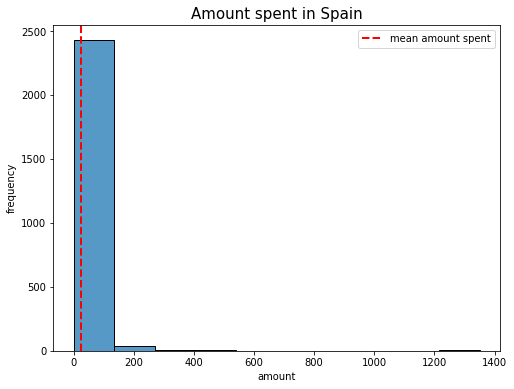

In [53]:
# plot hist
fig, ax = plt.subplots()

sns.histplot(spain_customers .amount_spent, bins=10)

# plot the mean
plt.axvline(
    spain_customers .amount_spent.mean(),
    c="red",
    linewidth= 2,
    linestyle='--',
    label='mean amount spent'
)

plt.title('Amount spent in Spain', size=15)
plt.xlabel('amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

#### Select all orders made in the month of August

In [54]:
august_orders = orders[orders.month == 8]
august_orders.head(4)

InvoiceNo StockCode  year  month  day  hour  \
285421     561904     22075  2011      8    1     8   
285422     561904    85049E  2011      8    1     8   
285423     561905     21385  2011      8    1     9   
285424     561905    84970L  2011      8    1     9   

                             Description  Quantity          InvoiceDate  \
285421      6 ribbons elegant christmas         96  2011-08-01 08:30:00   
285422         scandinavian reds ribbons       156  2011-08-01 08:30:00   
285423   ivory hanging decoration  heart        24  2011-08-01 09:31:00   
285424  single heart zinc t-light holder        12  2011-08-01 09:31:00   

        UnitPrice  CustomerID         Country  amount_spent  
285421       1.45       17941  United Kingdom        139.20  
285422       1.06       17941  United Kingdom        165.36  
285423       0.85       14947  United Kingdom         20.40  
285424       0.95       14947  United Kingdom         11.40

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [55]:
country_august_orders = august_orders.groupby("Country").Quantity.mean()
country_august_orders

Country
Australia          117.476636
Austria              8.977273
Belgium             10.664948
Canada              10.400000
Channel Islands     14.350000
Denmark             21.125000
EIRE                15.735245
Finland             11.360656
France              13.985940
Germany             12.127044
Iceland             12.590909
Israel              17.707602
Italy               12.073684
Malta                6.945455
Netherlands        106.700000
Norway               8.259740
Poland              10.941176
Portugal            25.024390
Spain                6.349206
Sweden              32.850000
Switzerland         11.228464
United Kingdom      13.453019
Unspecified          8.043478
Name: Quantity, dtype: float64

#### What's the  average amount of money spent by country

In [56]:
avg_country = orders.groupby("Country").amount_spent.mean()
avg_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [57]:
cost_item = orders.UnitPrice.max()
cost_item

8142.75

In [58]:
expensive_item = orders.loc[orders["UnitPrice"] == 8142.75]
expensive_item

InvoiceNo StockCode  year  month  day  hour Description  Quantity  \
173382     551697      POST  2011      5    2    13     postage         1   

                InvoiceDate  UnitPrice  CustomerID         Country  \
173382  2011-05-03 13:46:00    8142.75       16029  United Kingdom   

        amount_spent  
173382       8142.75

#### What was the average amount spent per year ?

In [59]:
avg_amount_year = orders.groupby("year").amount_spent.mean()
avg_amount_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64